Mounting Google Drive...
Mounted at /content/drive
Google Drive mounted.

Loading file: /content/drive/MyDrive/all_musk_posts.csv
CSV file loaded successfully.
Analyzing tweets for keywords...
Data analysis complete.

--- Generating Improved Bar Chart ---
Bar chart saved to your Google Drive: /content/drive/MyDrive/affirmative_words_barchart_improved.png


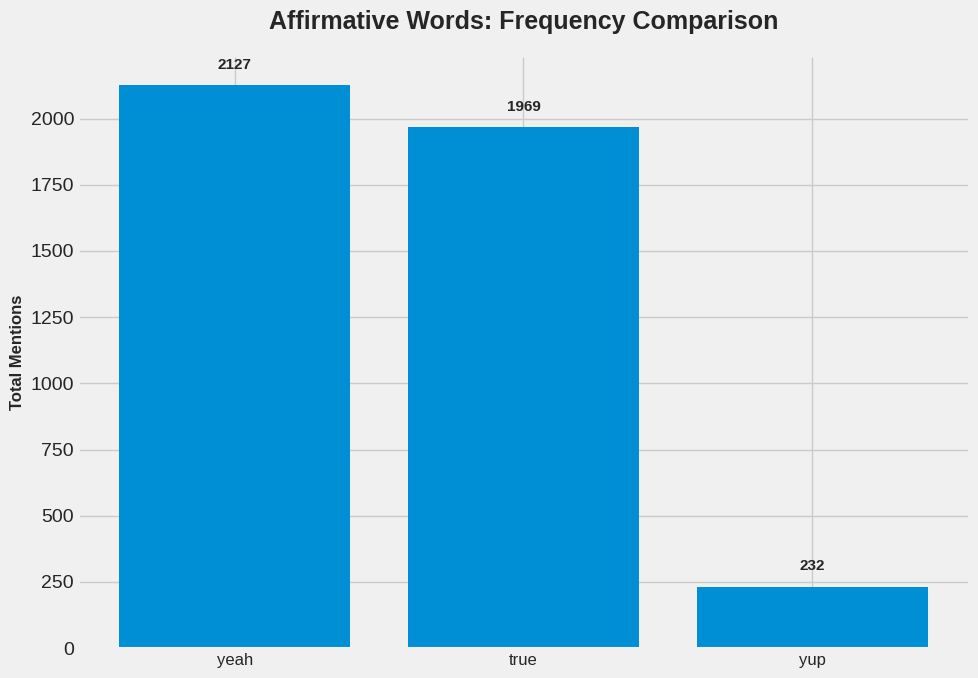

In [8]:
# Import necessary libraries
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# --- PART 0: DATA LOADING AND PREPARATION ---

# Mount Google Drive to access your files
print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)
print("Google Drive mounted.")

# Define file paths and column names
raw_file_path = '/content/drive/MyDrive/all_musk_posts.csv'
date_column_name = 'createdAt'
text_column_name = 'fullText'

# Define the keywords we want to analyze
# We include 'yup' as it fits the "affirmative" category
affirmative_words = ['yeah', 'true', 'yup']

# Load the dataset
try:
    print(f"\nLoading file: {raw_file_path}")
    df = pd.read_csv(raw_file_path, usecols=[date_column_name, text_column_name], parse_dates=[date_column_name], low_memory=False)
    print("CSV file loaded successfully.")

    # Create an analysis DataFrame by finding all occurrences of the target words
    analysis_data = []
    print("Analyzing tweets for keywords...")
    # Convert the text column to lowercase once to speed up the search
    df[text_column_name] = df[text_column_name].str.lower()

    for term in affirmative_words:
        # Count occurrences of each term
        term_count = df[df[text_column_name].str.contains(term, na=False)].shape[0]
        analysis_data.append({'Found_Term': term, 'Total_Count': term_count})

    df_affirmative = pd.DataFrame(analysis_data)
    df_affirmative = df_affirmative.sort_values(by='Total_Count', ascending=False)

    print("Data analysis complete.")

except FileNotFoundError:
    print(f"\nCRITICAL ERROR: File not found at the path: {raw_file_path}")
except KeyError as e:
    print(f"\nCRITICAL ERROR: A specified column was not found: {e}")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")


# --- PART 1: GENERATING THE IMPROVED BAR CHART ---

print("\n--- Generating Improved Bar Chart ---")

# Apply a modern visual style
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'

# Create the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the data
bars = ax.bar(df_affirmative['Found_Term'], df_affirmative['Total_Count'], color='#008fd5')

# Set titles and labels
ax.set_title("Affirmative Words: Frequency Comparison", fontsize=18, weight='bold', pad=20)
ax.set_ylabel('Total Mentions', fontsize=12, weight='bold')
ax.tick_params(axis='x', labelsize=12)

# Add data labels on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 50, f'{int(yval)}', ha='center', va='bottom', fontsize=11, weight='bold')

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Ensure everything fits and save the figure
plt.tight_layout()
barchart_save_path = '/content/drive/MyDrive/affirmative_words_barchart_improved.png'
plt.savefig(barchart_save_path, dpi=150)
print(f"Bar chart saved to your Google Drive: {barchart_save_path}")

# Display the plot in Colab
plt.show()

Mounting Google Drive...
Mounted at /content/drive
Google Drive mounted.

Loading file: /content/drive/MyDrive/all_musk_posts.csv
CSV file loaded successfully.
Analyzing tweets for keywords...

An unexpected error occurred: 'Date'

--- Generating Stacked Area Chart ---
Stacked area chart saved to your Google Drive: /content/drive/MyDrive/affirmative_words_stacked_timeline.png


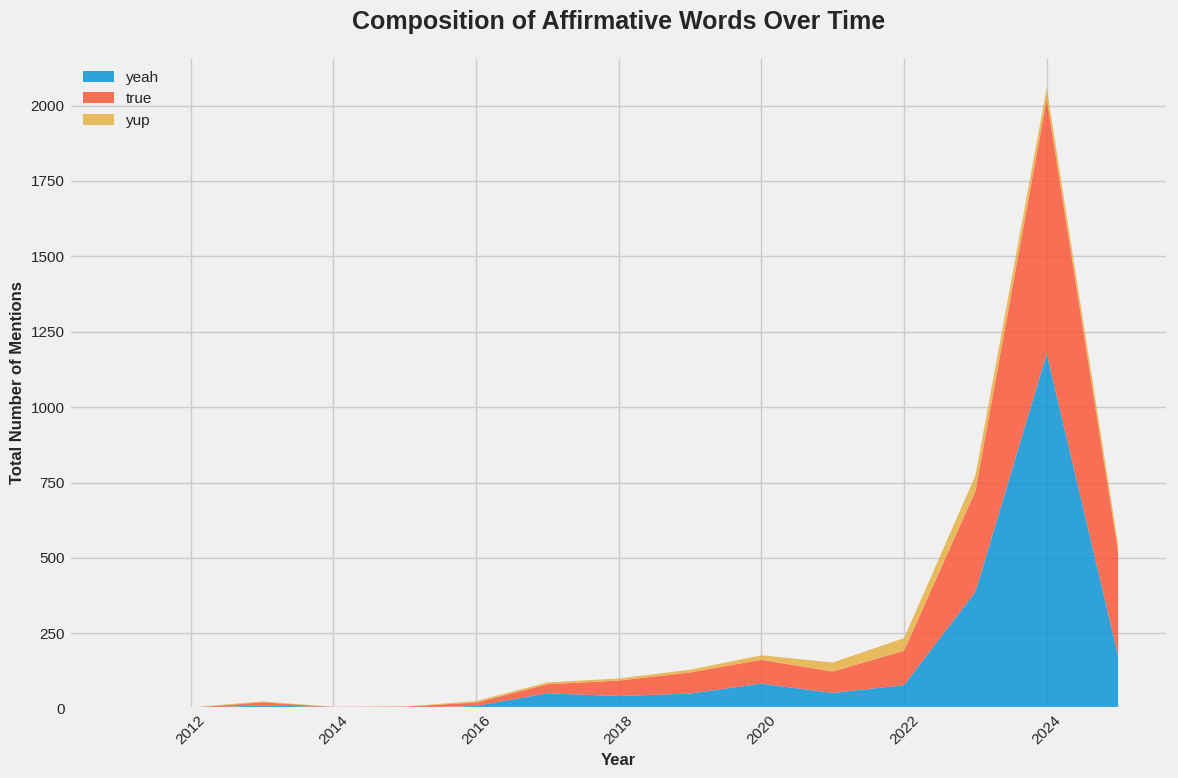

In [13]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# --- PART 0: DATA LOADING AND PREPARATION ---

print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)
print("Google Drive mounted.")

raw_file_path = '/content/drive/MyDrive/all_musk_posts.csv'
date_column_name = 'createdAt'
text_column_name = 'fullText'

affirmative_words = ['yeah', 'true', 'yup']

try:
    print(f"\nLoading file: {raw_file_path}")
    df = pd.read_csv(raw_file_path, usecols=[date_column_name, text_column_name], parse_dates=[date_column_name], low_memory=False)
    print("CSV file loaded successfully.")

    analysis_data = []
    print("Analyzing tweets for keywords...")
    df[text_column_name] = df[text_column_name].str.lower()

    for term in affirmative_words:
        df_term = df[df[text_column_name].str.contains(term, na=False)].copy()
        df_term['Found_Term'] = term
        analysis_data.append(df_term)

    df_analysis = pd.concat(analysis_data)
    df_analysis['Year'] = df_analysis['Date'].dt.year

    counts_by_year_term = df_analysis.groupby(['Year', 'Found_Term']).size().reset_index(name='Count')
    print("Data analysis complete.")

except FileNotFoundError:
    print(f"\nCRITICAL ERROR: File not found at the path: {raw_file_path}")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")


# --- PART 1: PREPARING DATA FOR STACKED CHART ---

df_pivot = counts_by_year_term.pivot(index='Year', columns='Found_Term', values='Count').fillna(0)
df_pivot = df_pivot[affirmative_words]


# --- PART 2: GENERATING THE IMPROVED STACKED AREA CHART ---

print("\n--- Generating Stacked Area Chart ---")

plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#008fd5', '#fc4f30', '#e5ae38']

ax.stackplot(df_pivot.index, df_pivot['yeah'], df_pivot['true'], df_pivot['yup'], labels=affirmative_words, colors=colors, alpha=0.8)

ax.set_title("Composition of Affirmative Words Over Time", fontsize=18, weight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12, weight='bold')
ax.set_ylabel('Total Number of Mentions', fontsize=12, weight='bold')
ax.legend(loc='upper left', fontsize=11)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=45)

plt.tight_layout()
stacked_timeline_save_path = '/content/drive/MyDrive/affirmative_words_stacked_timeline.png'
plt.savefig(stacked_timeline_save_path, dpi=150)
print(f"Stacked area chart saved to your Google Drive: {stacked_timeline_save_path}")

plt.show()

Mounting Google Drive...
Mounted at /content/drive
Google Drive mounted.

Loading file: /content/drive/MyDrive/all_musk_posts.csv
CSV file loaded successfully.
Analyzing tweets for keywords...

An unexpected error occurred: 'Date'

--- Generating Improved Timeline Chart ---
Timeline chart saved to your Google Drive: /content/drive/MyDrive/affirmative_words_timeline.png


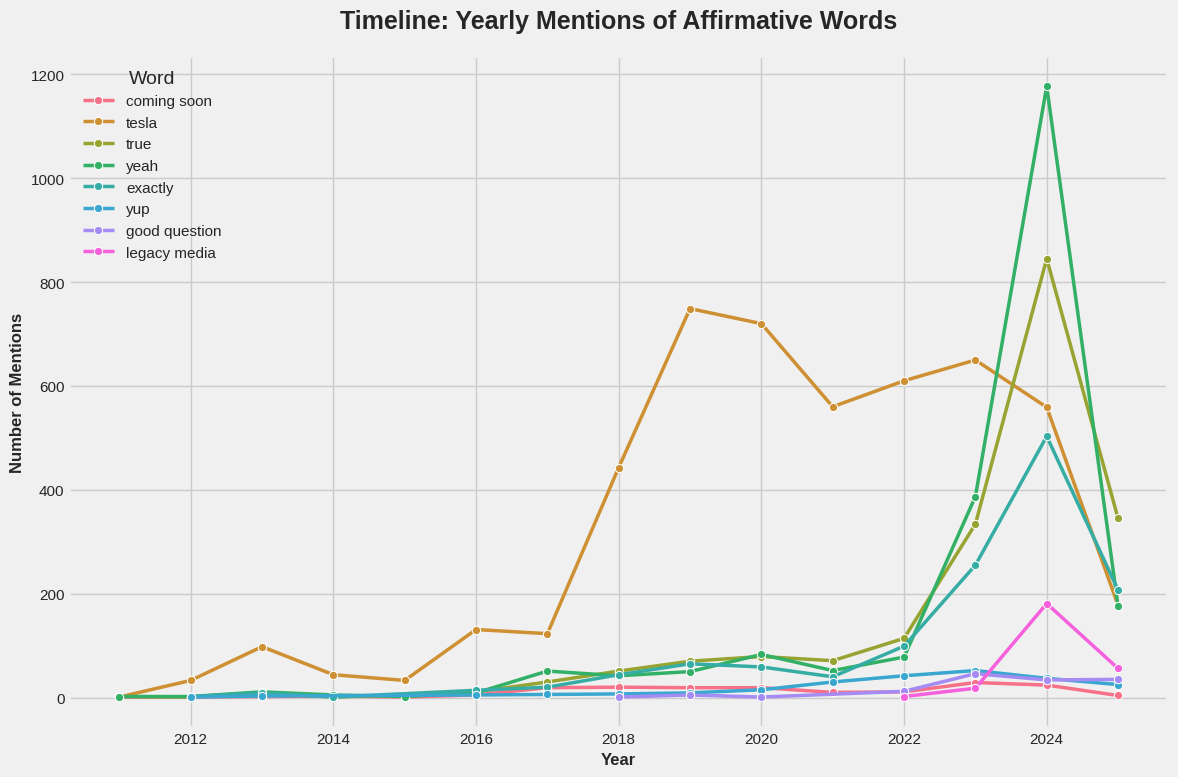

In [9]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

# --- PART 0: DATA LOADING AND PREPARATION ---

print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)
print("Google Drive mounted.")

raw_file_path = '/content/drive/MyDrive/all_musk_posts.csv'
date_column_name = 'createdAt'
text_column_name = 'fullText'

affirmative_words = ['yeah', 'true', 'yup']

try:
    print(f"\nLoading file: {raw_file_path}")
    df = pd.read_csv(raw_file_path, usecols=[date_column_name, text_column_name], parse_dates=[date_column_name], low_memory=False)
    print("CSV file loaded successfully.")

    analysis_data = []
    print("Analyzing tweets for keywords...")
    df[text_column_name] = df[text_column_name].str.lower()

    for term in affirmative_words:
        # This approach is simple but can be slow on very large datasets.
        # It finds rows containing the term and tags them.
        df_term = df[df[text_column_name].str.contains(term, na=False)].copy()
        df_term['Found_Term'] = term
        analysis_data.append(df_term)

    df_analysis = pd.concat(analysis_data)
    df_analysis['Year'] = df_analysis['Date'].dt.year

    counts_by_year_term = df_analysis.groupby(['Year', 'Found_Term']).size().reset_index(name='Count')
    print("Data analysis complete.")

except FileNotFoundError:
    print(f"\nCRITICAL ERROR: File not found at the path: {raw_file_path}")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")


# --- PART 1: GENERATING THE IMPROVED TIMELINE CHART ---

print("\n--- Generating Improved Timeline Chart ---")

plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots(figsize=(12, 8))

# Use seaborn to automatically plot each word as a different colored line
sns.lineplot(
    data=counts_by_year_term,
    x='Year',
    y='Count',
    hue='Found_Term',
    marker='o',
    linewidth=2.5,
    ax=ax
)

ax.set_title("Timeline: Yearly Mentions of Affirmative Words", fontsize=18, weight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12, weight='bold')
ax.set_ylabel('Number of Mentions', fontsize=12, weight='bold')
ax.legend(title='Word', fontsize=11)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

plt.tight_layout()
timeline_save_path = '/content/drive/MyDrive/affirmative_words_timeline.png'
plt.savefig(timeline_save_path, dpi=150)
print(f"Timeline chart saved to your Google Drive: {timeline_save_path}")

plt.show()

Mounted at /content/drive


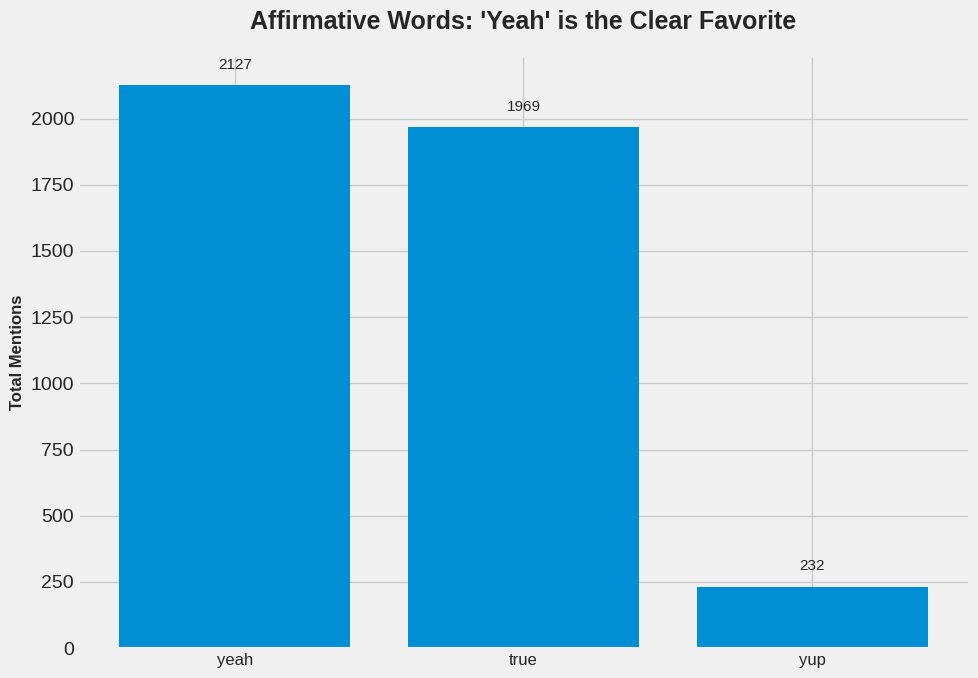

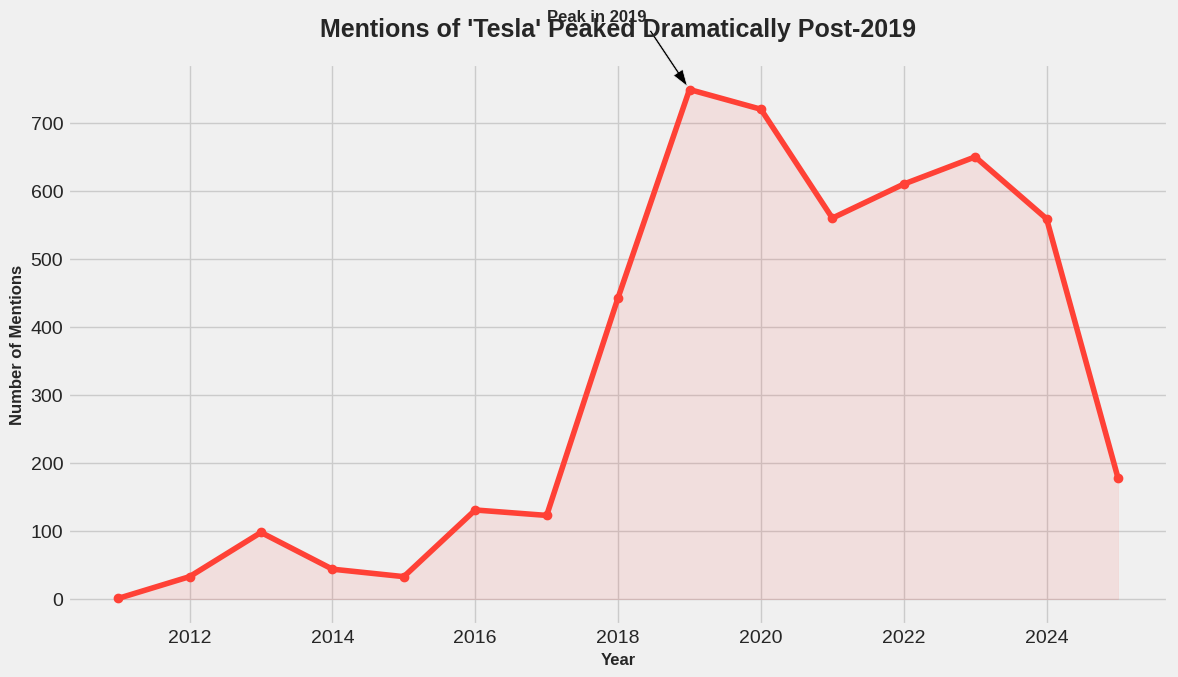

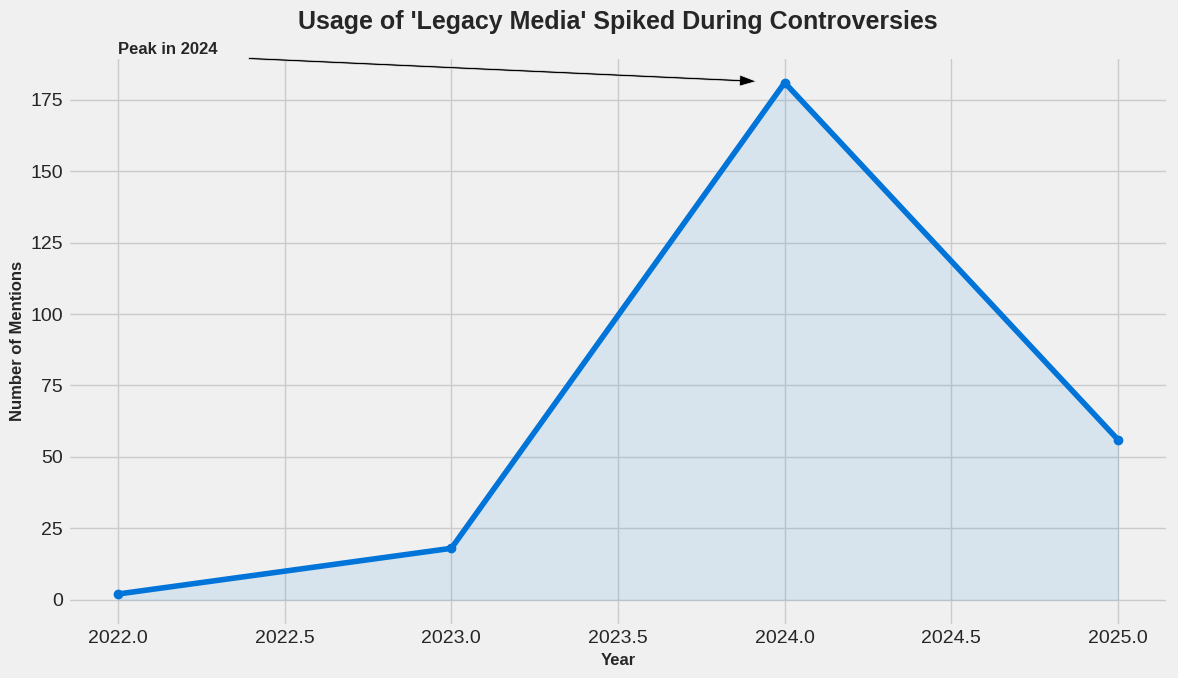

In [7]:
import pandas as pd
import re
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive', force_remount=True)

raw_file_path = '/content/drive/MyDrive/all_musk_posts.csv'
date_column_name = 'createdAt'
text_column_name = 'fullText'

target_terms = [
    'yeah', 'tesla', 'true', 'legacy media', 'coming soon',
    'good question', 'exactly', 'yup'
]

try:
    df = pd.read_csv(raw_file_path, parse_dates=[date_column_name], low_memory=False)
    analysis_data = []
    for index, row in df.iterrows():
        post_date = row[date_column_name]
        post_content = row[text_column_name]
        for term in target_terms:
            if isinstance(post_content, str) and term in post_content.lower():
                analysis_data.append({
                    'Date': post_date,
                    'Found_Term': term
                })
    df_analysis = pd.DataFrame(analysis_data)
    df_analysis['Year'] = df_analysis['Date'].dt.year
    counts_by_year_term = df_analysis.groupby(['Year', 'Found_Term']).size().reset_index(name='Count')

except Exception as e:
    print(f"An error occurred during data loading: {e}")

plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'

fig1, ax1 = plt.subplots(figsize=(10, 7))

affirmative_words = ['yeah', 'true', 'yup']
df_affirmative = df_analysis[df_analysis['Found_Term'].isin(affirmative_words)]
affirmative_counts = df_affirmative['Found_Term'].value_counts()

bars = ax1.bar(affirmative_counts.index, affirmative_counts.values, color='#008fd5')
ax1.set_title("Affirmative Words: 'Yeah' is the Clear Favorite", fontsize=18, weight='bold', pad=20)
ax1.set_ylabel('Total Mentions', fontsize=12, weight='bold')
ax1.tick_params(axis='x', labelsize=12)

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval + 50, f'{int(yval)}', ha='center', va='bottom', fontsize=11)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
barchart_save_path = '/content/drive/MyDrive/affirmative_words_barchart_improved.png'
plt.savefig(barchart_save_path, dpi=150)
plt.show()

fig2, ax2 = plt.subplots(figsize=(12, 7))
tesla_yearly_counts = counts_by_year_term[counts_by_year_term['Found_Term'] == 'tesla']

ax2.plot(tesla_yearly_counts['Year'], tesla_yearly_counts['Count'], marker='o', linestyle='-', color='#ff4136')

ax2.fill_between(tesla_yearly_counts['Year'], tesla_yearly_counts['Count'], alpha=0.1, color='#ff4136')

peak_year = tesla_yearly_counts.loc[tesla_yearly_counts['Count'].idxmax()]
ax2.annotate(f"Peak in {int(peak_year['Year'])}",
             xy=(peak_year['Year'], peak_year['Count']),
             xytext=(peak_year['Year'] - 2, peak_year['Count'] + 100),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=12, weight='bold')

ax2.set_title("Mentions of 'Tesla' Peaked Dramatically Post-2019", fontsize=18, weight='bold', pad=20)
ax2.set_xlabel('Year', fontsize=12, weight='bold')
ax2.set_ylabel('Number of Mentions', fontsize=12, weight='bold')
plt.tight_layout()
tesla_timeline_save_path = '/content/drive/MyDrive/tesla_timeline_improved.png'
plt.savefig(tesla_timeline_save_path, dpi=150)
plt.show()

fig3, ax3 = plt.subplots(figsize=(12, 7))
media_yearly_counts = counts_by_year_term[counts_by_year_term['Found_Term'] == 'legacy media']

ax3.plot(media_yearly_counts['Year'], media_yearly_counts['Count'], marker='o', linestyle='-', color='#0074D9')

ax3.fill_between(media_yearly_counts['Year'], media_yearly_counts['Count'], alpha=0.1, color='#0074D9')

peak_year_media = media_yearly_counts.loc[media_yearly_counts['Count'].idxmax()]
ax3.annotate(f"Peak in {int(peak_year_media['Year'])}",
             xy=(peak_year_media['Year'], peak_year_media['Count']),
             xytext=(peak_year_media['Year'] - 2, peak_year_media['Count'] + 10),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=12, weight='bold')

ax3.set_title("Usage of 'Legacy Media' Spiked During Controversies", fontsize=18, weight='bold', pad=20)
ax3.set_xlabel('Year', fontsize=12, weight='bold')
ax3.set_ylabel('Number of Mentions', fontsize=12, weight='bold')
plt.tight_layout()
media_timeline_save_path = '/content/drive/MyDrive/legacy_media_timeline_improved.png'
plt.savefig(media_timeline_save_path, dpi=150)
plt.show()

Mounted at /content/drive


/tmp/ipython-input-695583309.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=affirmative_counts.index, y=affirmative_counts.values, palette='viridis')


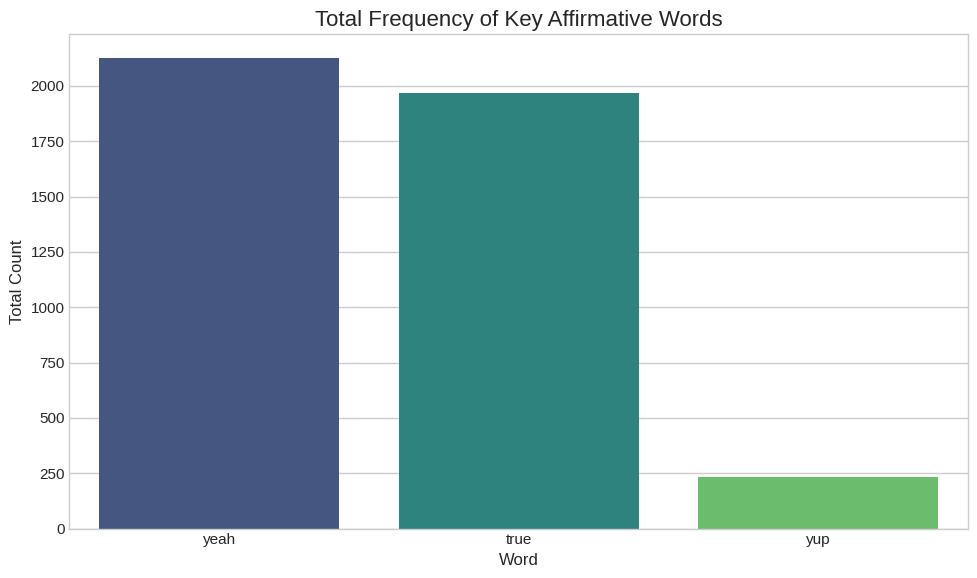

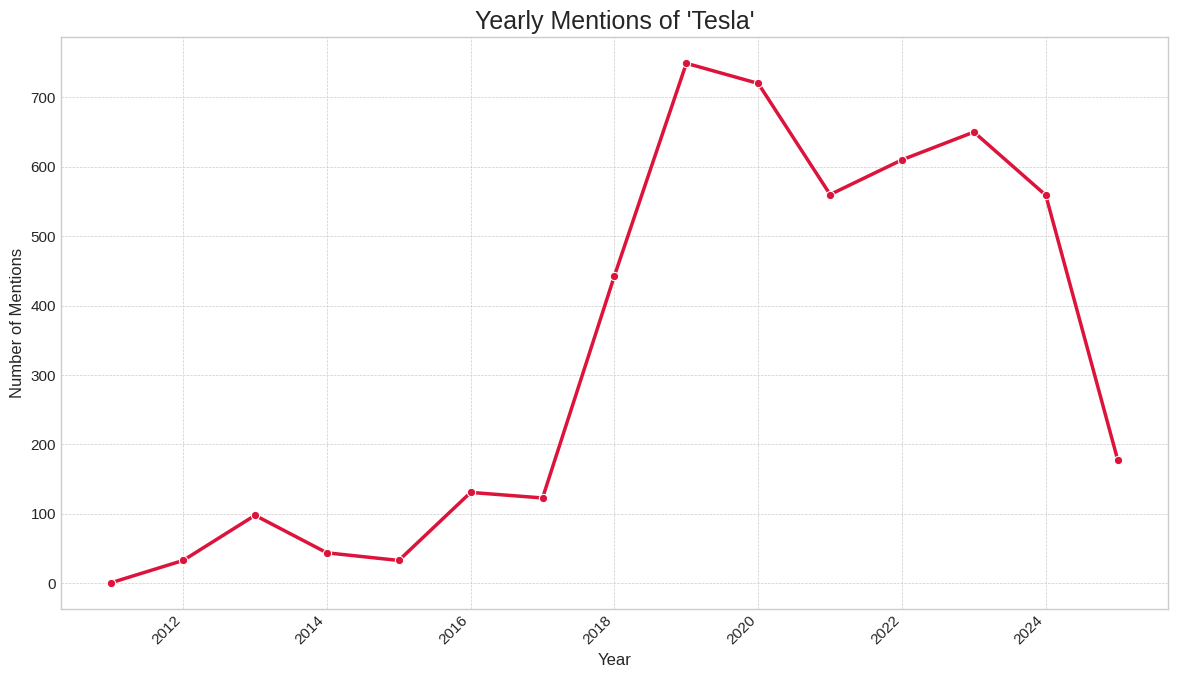

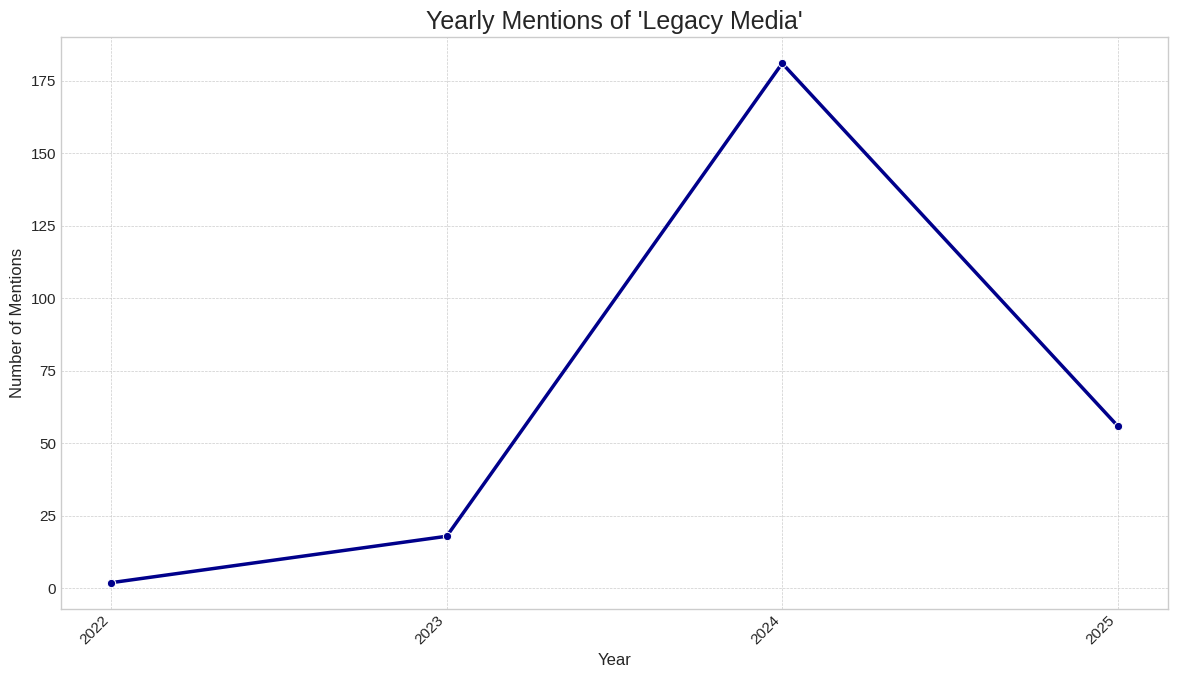

In [14]:
import pandas as pd
import re
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

drive.mount('/content/drive', force_remount=True)

raw_file_path = '/content/drive/MyDrive/all_musk_posts.csv'
date_column_name = 'createdAt'
text_column_name = 'fullText'

target_terms = [
    'yeah', 'tesla', 'true', 'legacy media', 'coming soon',
    'good question', 'exactly', 'yup'
]

try:
    df = pd.read_csv(raw_file_path, parse_dates=[date_column_name], low_memory=False)

    analysis_data = []
    for index, row in df.iterrows():
        post_date = row[date_column_name]
        post_content = row[text_column_name]
        for term in target_terms:
            if isinstance(post_content, str) and term in post_content.lower():
                analysis_data.append({
                    'Date': post_date,
                    'Tweet_Text': post_content,
                    'Found_Term': term
                })

    df_analysis = pd.DataFrame(analysis_data)
    df_analysis['Year'] = df_analysis['Date'].dt.year

    counts_by_year_term = df_analysis.groupby(['Year', 'Found_Term']).size().reset_index(name='Count')

    # --- Bar Chart for Affirmative Words (no changes needed here) ---
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))
    affirmative_words = ['yeah', 'true', 'yup']
    df_affirmative = df_analysis[df_analysis['Found_Term'].isin(affirmative_words)]
    affirmative_counts = df_affirmative['Found_Term'].value_counts()
    sns.barplot(x=affirmative_counts.index, y=affirmative_counts.values, palette='viridis')
    plt.title('Total Frequency of Key Affirmative Words', fontsize=16)
    plt.xlabel('Word', fontsize=12)
    plt.ylabel('Total Count', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    barchart_save_path = '/content/drive/MyDrive/affirmative_words_barchart.png'
    plt.savefig(barchart_save_path, dpi=150)
    plt.show()

    # --- Timeline Chart for 'Tesla' (with fix for integer years) ---
    fig, ax = plt.subplots(figsize=(12, 7))
    tesla_yearly_counts = counts_by_year_term[counts_by_year_term['Found_Term'] == 'tesla']
    sns.lineplot(data=tesla_yearly_counts, x='Year', y='Count', marker='o', color='crimson', linewidth=2.5, ax=ax)

    # THIS IS THE FIX: Force integer ticks on the x-axis
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.title("Yearly Mentions of 'Tesla'", fontsize=18)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Number of Mentions", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    tesla_timeline_save_path = '/content/drive/MyDrive/tesla_mentions_timeline.png'
    plt.savefig(tesla_timeline_save_path, dpi=150)
    plt.show()

    # --- Timeline Chart for 'Legacy Media' (with fix for integer years) ---
    fig2, ax2 = plt.subplots(figsize=(12, 7))
    media_yearly_counts = counts_by_year_term[counts_by_year_term['Found_Term'] == 'legacy media']
    sns.lineplot(data=media_yearly_counts, x='Year', y='Count', marker='o', color='darkblue', linewidth=2.5, ax=ax2)

    # THIS IS THE FIX: Force integer ticks on the x-axis
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.title("Yearly Mentions of 'Legacy Media'", fontsize=18)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Number of Mentions", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    media_timeline_save_path = '/content/drive/MyDrive/legacy_media_timeline.png'
    plt.savefig(media_timeline_save_path, dpi=150)
    plt.show()

except FileNotFoundError:
    print(f"CRITICAL ERROR: File not found at the path: {raw_file_path}")
except KeyError as e:
    print(f"CRITICAL ERROR: A specified column was not found: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Mounting Google Drive...
Mounted at /content/drive
Google Drive mounted.
Data analysis complete.

--- Generating Improved Bar Chart ---


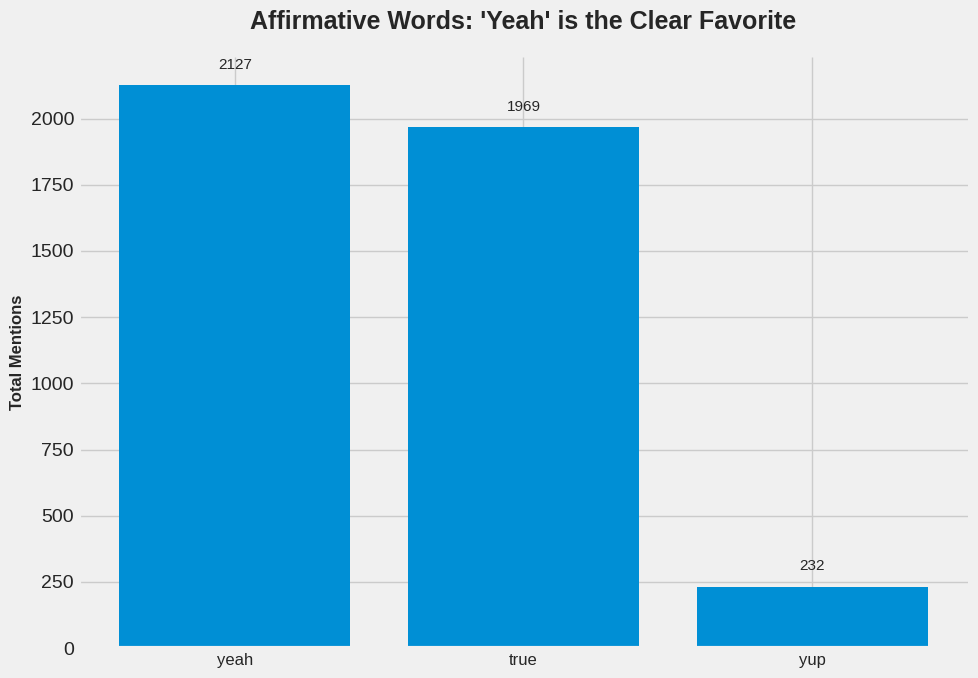


--- Generating Improved 'Tesla' Timeline ---


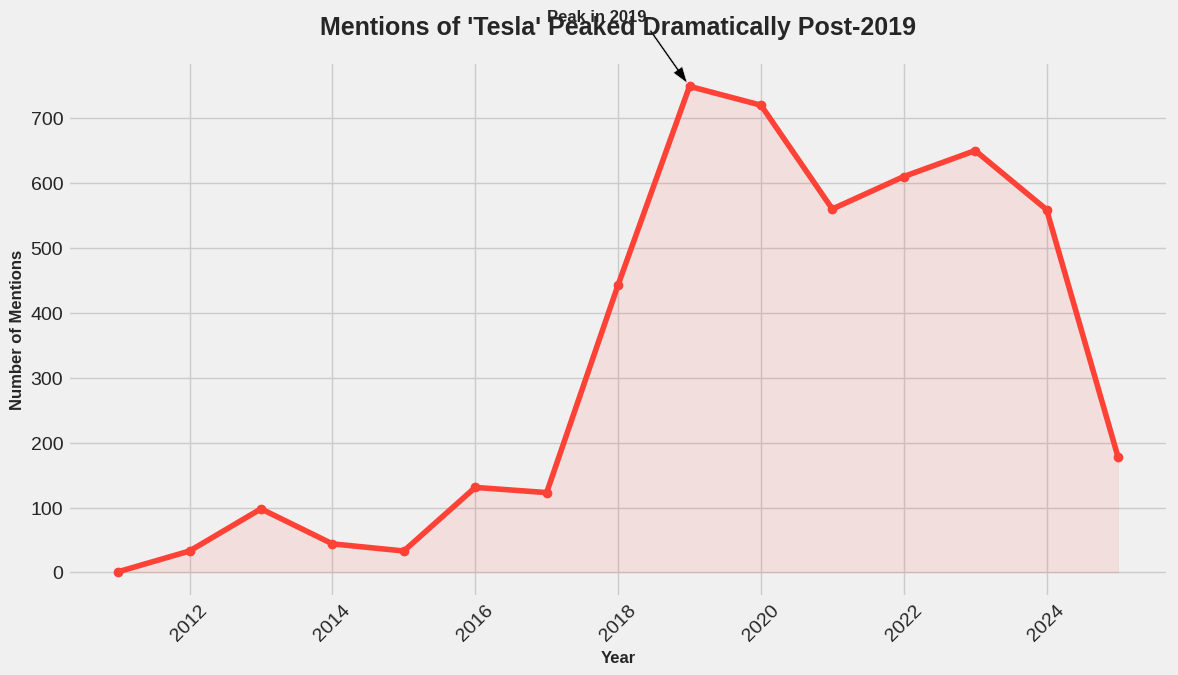


--- Generating Improved 'Legacy Media' Timeline ---


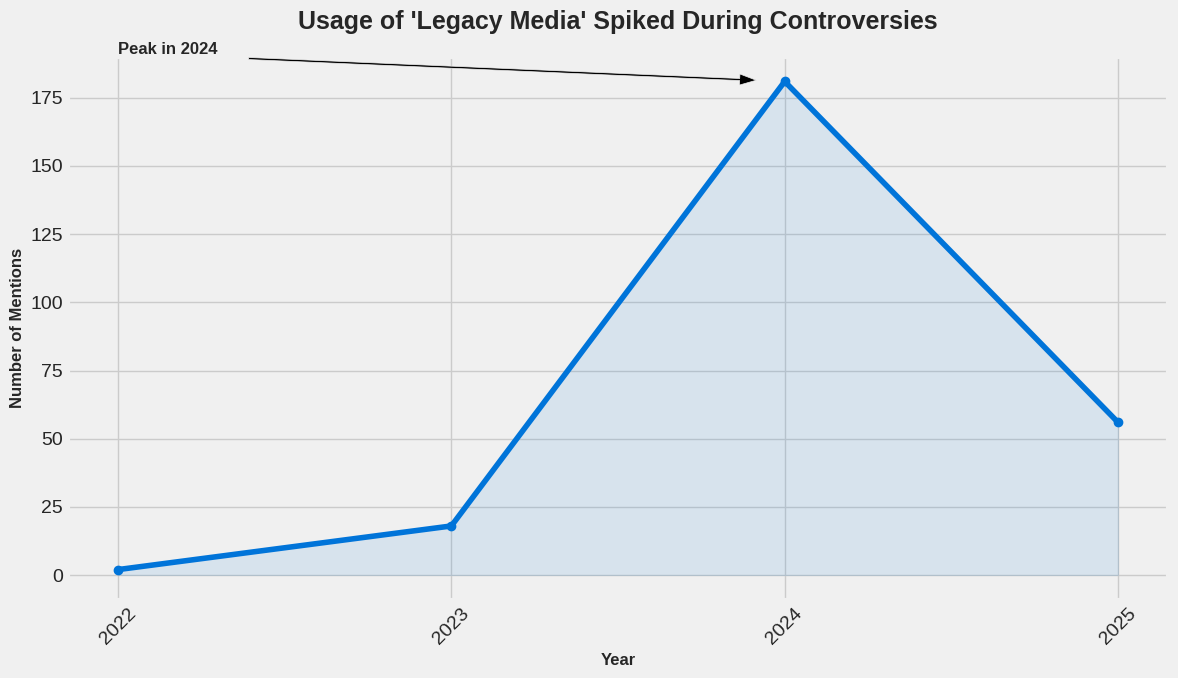

In [15]:
import pandas as pd
import re
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# --- PART 0: DATA LOADING AND PREPARATION ---

print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)
print("Google Drive mounted.")

raw_file_path = '/content/drive/MyDrive/all_musk_posts.csv'
date_column_name = 'createdAt'
text_column_name = 'fullText'

target_terms = [
    'yeah', 'tesla', 'true', 'legacy media', 'coming soon',
    'good question', 'exactly', 'yup'
]

try:
    df = pd.read_csv(raw_file_path, parse_dates=[date_column_name], low_memory=False)
    analysis_data = []
    for index, row in df.iterrows():
        post_date = row[date_column_name]
        post_content = row[text_column_name]
        for term in target_terms:
            if isinstance(post_content, str) and term in post_content.lower():
                analysis_data.append({
                    'Date': post_date,
                    'Found_Term': term
                })
    df_analysis = pd.DataFrame(analysis_data)
    df_analysis['Year'] = df_analysis['Date'].dt.year
    counts_by_year_term = df_analysis.groupby(['Year', 'Found_Term']).size().reset_index(name='Count')
    print("Data analysis complete.")
except Exception as e:
    print(f"An error occurred during data loading: {e}")

# --- APPLYING A MODERN VISUAL STYLE ---
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'


# --- PART 1: IMPROVED BAR CHART FOR AFFIRMATIVE WORDS ---
print("\n--- Generating Improved Bar Chart ---")
fig1, ax1 = plt.subplots(figsize=(10, 7))

affirmative_words = ['yeah', 'true', 'yup']
df_affirmative = df_analysis[df_analysis['Found_Term'].isin(affirmative_words)]
affirmative_counts = df_affirmative['Found_Term'].value_counts()

bars = ax1.bar(affirmative_counts.index, affirmative_counts.values, color='#008fd5')
ax1.set_title("Affirmative Words: 'Yeah' is the Clear Favorite", fontsize=18, weight='bold', pad=20)
ax1.set_ylabel('Total Mentions', fontsize=12, weight='bold')
ax1.tick_params(axis='x', labelsize=12)

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval + 50, f'{int(yval)}', ha='center', va='bottom', fontsize=11)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.tight_layout()
barchart_save_path = '/content/drive/MyDrive/affirmative_words_barchart_improved.png'
plt.savefig(barchart_save_path, dpi=150)
plt.show()


# --- PART 2: IMPROVED TIMELINE FOR 'TESLA' ---
print("\n--- Generating Improved 'Tesla' Timeline ---")
fig2, ax2 = plt.subplots(figsize=(12, 7))
tesla_yearly_counts = counts_by_year_term[counts_by_year_term['Found_Term'] == 'tesla']

ax2.plot(tesla_yearly_counts['Year'], tesla_yearly_counts['Count'], marker='o', linestyle='-', color='#ff4136')
ax2.fill_between(tesla_yearly_counts['Year'], tesla_yearly_counts['Count'], alpha=0.1, color='#ff4136')

peak_year = tesla_yearly_counts.loc[tesla_yearly_counts['Count'].idxmax()]
ax2.annotate(f"Peak in {int(peak_year['Year'])}",
             xy=(peak_year['Year'], peak_year['Count']),
             xytext=(peak_year['Year'] - 2, peak_year['Count'] + 100),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=12, weight='bold')

ax2.set_title("Mentions of 'Tesla' Peaked Dramatically Post-2019", fontsize=18, weight='bold', pad=20)
ax2.set_xlabel('Year', fontsize=12, weight='bold')
ax2.set_ylabel('Number of Mentions', fontsize=12, weight='bold')
ax2.xaxis.set_major_locator(mticker.MaxNLocator(integer=True)) # Fix for integer years
plt.xticks(rotation=45)
plt.tight_layout()
tesla_timeline_save_path = '/content/drive/MyDrive/tesla_timeline_improved.png'
plt.savefig(tesla_timeline_save_path, dpi=150)
plt.show()


# --- PART 3: IMPROVED TIMELINE FOR 'LEGACY MEDIA' ---
print("\n--- Generating Improved 'Legacy Media' Timeline ---")
fig3, ax3 = plt.subplots(figsize=(12, 7))
media_yearly_counts = counts_by_year_term[counts_by_year_term['Found_Term'] == 'legacy media']

ax3.plot(media_yearly_counts['Year'], media_yearly_counts['Count'], marker='o', linestyle='-', color='#0074D9')
ax3.fill_between(media_yearly_counts['Year'], media_yearly_counts['Count'], alpha=0.1, color='#0074D9')

peak_year_media = media_yearly_counts.loc[media_yearly_counts['Count'].idxmax()]
ax3.annotate(f"Peak in {int(peak_year_media['Year'])}",
             xy=(peak_year_media['Year'], peak_year_media['Count']),
             xytext=(peak_year_media['Year'] - 2, peak_year_media['Count'] + 10),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=12, weight='bold')

ax3.set_title("Usage of 'Legacy Media' Spiked During Controversies", fontsize=18, weight='bold', pad=20)
ax3.set_xlabel('Year', fontsize=12, weight='bold')
ax3.set_ylabel('Number of Mentions', fontsize=12, weight='bold')
ax3.xaxis.set_major_locator(mticker.MaxNLocator(integer=True)) # Fix for integer years
plt.xticks(rotation=45)
plt.tight_layout()
media_timeline_save_path = '/content/drive/MyDrive/legacy_media_timeline_improved.png'
plt.savefig(media_timeline_save_path, dpi=150)
plt.show()